# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [140]:
m = 1
A = 0.001#17#0.125#0.12699485911198283#0.04
run = 1

twod=true
zeroformat=false

## old
"""Agrid=0.35
kgrid=0.7
mgrid=0.5#0.55
fgrid=5"""

# new
Agrid=0.45
kgrid=0.5
mgrid=0.5#0.55
fgrid=4.5

4.5

In [141]:
function compactify(r)
    return r/(1+r)
end

function uncompactify(x)
    return x/(1-x)
end

uncompactify (generic function with 1 method)

Choose your grid

In [142]:
global compactified=true
global loggrid=true

global bisection=true

true

In [143]:
using Quadmath, Printf

res=m;
N=2.0^m*400.0/2.0

if compactified==true
    Xf=1.0
else
    Xf=10.0#Float128(1.0);
end

dx=Xf/N#Float128(Xf/N);
if loggrid==false
    dt=0.5*round(dx,digits=10)#0.5*dx#round(dx,digits=10);#dx
else
    dt=0.1*round(dx,digits=10)
end
Nt=2.0^m*400.0/2.0
Tf=Nt*dt; #final time
#print(Tf)

In [144]:
iter=1

1

In [145]:
print(N)

400.0

In [146]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

# Grid

In [147]:
using Printf
include("./ScalarField.jl");
#include("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/myspline.jl");

In [148]:

if loggrid==true
    ori=(tan(-mgrid/Agrid)/fgrid+kgrid)#0.0#Float128(0.0)#0.0;
    Xf=(tan((1-mgrid)/Agrid)/fgrid+kgrid)
else
    ori=0.0
    Xf=1.0
end

dx=(Xf-ori)/N

initX1 = nothing

initX1=range(ori, stop=Xf, step=dx);
#initX1=create_range(ori,Xf,dx,N)
#initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)
#initX=create_range(ori-3.0*dx,Xf+3.0*dx,dx,N+6)

L=length(initX1)+6;
println("step size is  ", dx)
println("the time step is ", dt)

initX=[ori-3*dx; ori-2*dx; ori-dx; collect(initX1); Xf+dx; Xf+2*dx; Xf+3*dx];

step size is  0.0022444114796869186
the time step is 0.00025


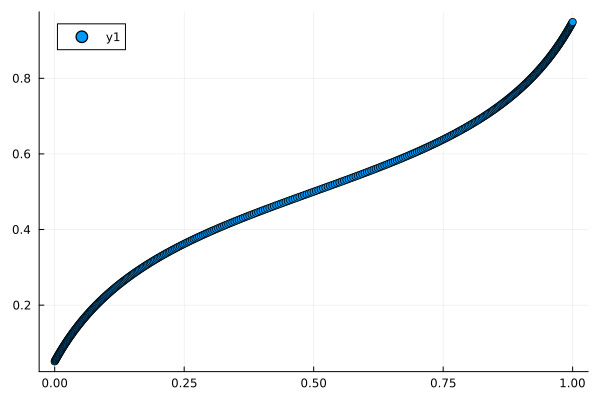

In [149]:
using Plots
scatter(inverse.(initX1), (initX1))#, ylim=[-1,1],xlim=[0,1])

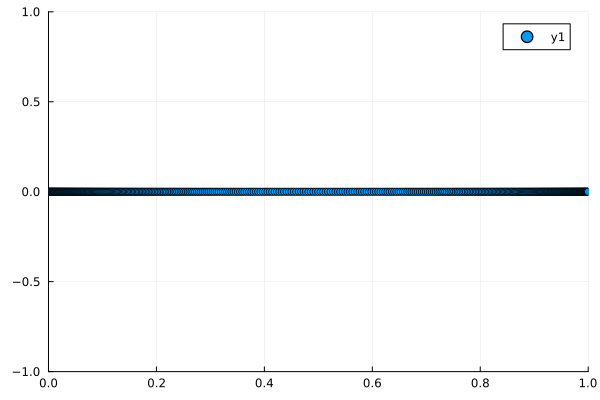

In [152]:
using Plots
scatter(inverse.(initX1), zeros(length(initX1)), ylim=[-1,1],xlim=[0,1])

In [ ]:
plot

# Initial data of m β Ψ and Ψ,x

In [95]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initpsi=zeros(L)
initderpsi=zeros(L)

state_array=[initm initbeta initpsi initderpsi initX];

#PSI
r0=0.7
sigma=0.3


#PSI,R FROM PSI
initderpsi[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)

state_array[:,4] = initderpsi
state_array=ghost(state_array)

####
if loggrid==true
    derpsi_func = Spline1D((initX[4:L-3]), state_array[4:L-3,4],  k=4);
else
    derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);
end;

In [96]:
#evalInterval(Float128.([0.1]),initX,coef,3);

In [97]:
y0=[0.0, 0.0, 0.0]#Float128.([0.0 0.0 0.0])

state_array[4:L-3,1:3] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:]);

state_array = ghost(state_array);

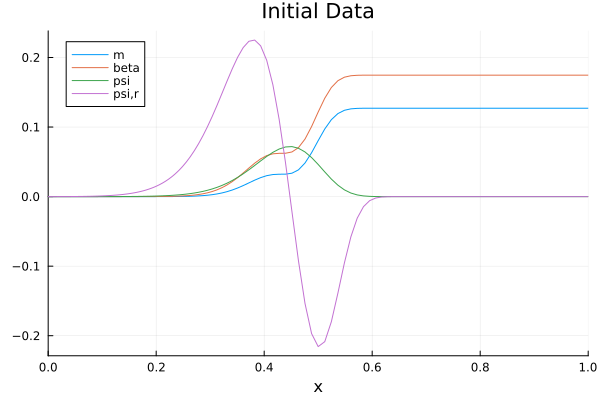

In [98]:
using Plots #showing initial data and the initial status of the horizon finder
plot(inverse(initX[4:L-3]), state_array[4:L-3,1:4], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,r"],xlim=[0,1])

In [99]:
monitor_ratio=zeros(L)
global monitor_ratio[5:L-4] = 2 .* state_array[5:L-4,1] ./ inverse(initX[5:L-4]) .* (1 .- inverse(initX[5:L-4]));

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [100]:
using Tables

global files=["m", "beta", "psi", "derpsi"]

#print_muninn(files, t, state_array[:,1:5],res,"a")
print_muninn(files, 0, state_array[:,1:5],res,"w")

In [101]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

In [102]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx)/dt)

0.5454313781956688


In [103]:
using Base.Threads
Threads.nthreads()

4

In [104]:
#global dt=5e-5

 ## Time evolution

fixed grid

In [105]:
finaltime=5.0
evol_stats, T_interp = timeevolution(state_array,finaltime,run);
#CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 100 dt is 0.0001363578445465554, t=0.013635784454780428 speed is 0.45241198594260795, dx/dt=51.21557453510604
 monitor ratio is 0.2076942063168728

iteration 200 dt is 0.0001363578445431902, t=0.02727156890927551 speed is 0.4524119859537731, dx/dt=51.21557453637
 monitor ratio is 0.20898186011700456

iteration 300 dt is 0.00013635784453850126, t=0.0409073533633704 speed is 0.4524119859693302, dx/dt=51.21557453813115
 monitor ratio is 0.21015568884608396

iteration 400 dt is 0.00013635784453204996, t=0.05454313781691158 speed is 0.4524119859907345, dx/dt=51.215574540554236
 monitor ratio is 0.21122161707593445

iteration 500 dt is 0.00013635784452327513, t=0.06817892226969548 speed is 0.45241198601984783, dx/dt=51.21557454385003
 monitor ratio is 0.21225171574253693

iteration 600 dt is 0.00013635784451146522, t=0.08181470672145531 speed is 0.45241198605903116, dx/dt=51.2155745482858
 monitor ratio is 0.21410643109867214

iteration 700 dt is 0.00013635784449572496, t=0.09545

 monitor ratio is 0.3157162231160906

iteration 5300 dt is 0.00013635767567839513, t=0.722696410680352 speed is 0.45241254621895005, dx/dt=51.21563796153074
 monitor ratio is 0.3184574889332323

iteration 5400 dt is 0.00013635766417393648, t=0.7363321776668829 speed is 0.4524125843888722, dx/dt=51.21564228258004
 monitor ratio is 0.32246597599356136

iteration 5500 dt is 0.0001363576527754847, t=0.7499679435072045 speed is 0.4524126222070873, dx/dt=51.21564656381412
 monitor ratio is 0.32600086827153923

iteration 5600 dt is 0.00013635764162465554, t=0.763603708218943 speed is 0.45241265920373663, dx/dt=51.21565075204235
 monitor ratio is 0.3290647791960254

iteration 5700 dt is 0.00013635763087803594, t=0.7772394718346446 speed is 0.45241269485928975, dx/dt=51.21565478845097
 monitor ratio is 0.3322782279136458

iteration 5800 dt is 0.00013635762070673328, t=0.790875234403254 speed is 0.45241272860603904, dx/dt=51.21565860877229
 monitor ratio is 0.33632961952790386

iteration 5900 dt

 monitor ratio is 0.3587718317839326

iteration 10500 dt is 0.00013635645123308946, t=1.4317555633370325 speed is 0.45241660876541145, dx/dt=51.216097864578316
 monitor ratio is 0.3518800348631715

iteration 10600 dt is 0.0001363563354522871, t=1.4453912026722908 speed is 0.4524169929144705, dx/dt=51.21614135240663
 monitor ratio is 0.3443788743206734

iteration 10700 dt is 0.00013635621196321648, t=1.4590268300511566 speed is 0.4524174026395075, dx/dt=51.21618773557909
 monitor ratio is 0.33614561210812655

iteration 10800 dt is 0.00013635607932841796, t=1.4726624446322982 speed is 0.45241784271002977, dx/dt=51.21623755403071
 monitor ratio is 0.3280536342108198

iteration 10900 dt is 0.00013635593583985695, t=1.4862980454173211 speed is 0.45241831879333944, dx/dt=51.21629144933187
 monitor ratio is 0.31900307500987285

iteration 11000 dt is 0.0001363557794716533, t=1.4999336312214149 speed is 0.4524188376113909, dx/dt=51.21635018244552
 monitor ratio is 0.30924653277844916

iteration

 monitor ratio is 0.09550156626746446

iteration 15700 dt is 0.0001363538180079077, t=2.0534627638606757 speed is 0.4524253457030657, dx/dt=51.21708693492911
 monitor ratio is 0.08830983477237034

iteration 15800 dt is 0.00013635370184566137, t=2.0670981329092437 speed is 0.45242573113260476, dx/dt=51.21713056771493
 monitor ratio is 0.07578622873240051

iteration 15900 dt is 0.0001363542332001573, t=2.0807335261813074 speed is 0.45242396808909174, dx/dt=51.216930981299775
 monitor ratio is 0.060708183496737525

iteration 16000 dt is 0.00013635501976613, t=2.0943689885708463 speed is 0.4524213582746592, dx/dt=51.21663553566671
 monitor ratio is 0.046073279725709765

iteration 16100 dt is 0.00013635577270954008, t=2.108004529575509 speed is 0.4524188600476057, dx/dt=51.216352722350884
 monitor ratio is 0.033802900144698174

iteration 16200 dt is 0.00013635637406043982, t=2.121640138616006 speed is 0.4524168648164298, dx/dt=51.21612685098987
 monitor ratio is 0.02441685212485397

iterati

 monitor ratio is 5.107196527729179e-5

iteration 20800 dt is 0.00013635784429012716, t=2.7488857976789767 speed is 0.45241198679339295, dx/dt=51.21557463141968
 monitor ratio is 4.832574724180316e-5

iteration 20900 dt is 0.00013635784431104416, t=2.7625215821090627 speed is 0.4524119867239939, dx/dt=51.21557462356332
 monitor ratio is 4.578220527354719e-5

iteration 21000 dt is 0.0001363578443299653, t=2.7761573665411383 speed is 0.4524119866612168, dx/dt=51.21557461645659
 monitor ratio is 4.340564959262289e-5

iteration 21100 dt is 0.00013635784434710995, t=2.7897931509750156 speed is 0.4524119866043338, dx/dt=51.21557461001712
 monitor ratio is 4.118134753964868e-5

iteration 21200 dt is 0.00013635784436267216, t=2.803428935410525 speed is 0.45241198655270104, dx/dt=51.215574604172005
 monitor ratio is 3.910437189584714e-5

iteration 21300 dt is 0.00013635784437682623, t=2.817064719847518 speed is 0.45241198650574027, dx/dt=51.21557459885578
 monitor ratio is 3.7165835922705365e-5

 monitor ratio is 6.220677406709976e-6

iteration 25900 dt is 0.00013635784454121784, t=3.4443108045382114 speed is 0.452411985960317, dx/dt=51.21557453711081
 monitor ratio is 6.023741149192958e-6

iteration 26000 dt is 0.0001363578445417698, t=3.457946588992363 speed is 0.4524119859584857, dx/dt=51.215574536903496
 monitor ratio is 5.834599903139578e-6

iteration 26100 dt is 0.00013635784454229337, t=3.471582373446568 speed is 0.45241198595674864, dx/dt=51.215574536706846
 monitor ratio is 5.652489795060426e-6

iteration 26200 dt is 0.00013635784454279018, t=3.4852181579008232 speed is 0.4524119859551003, dx/dt=51.21557453652024
 monitor ratio is 5.477105322705882e-6

iteration 26300 dt is 0.00013635784454326183, t=3.4988539423551264 speed is 0.45241198595353543, dx/dt=51.21557453634309
 monitor ratio is 5.308156322777021e-6

iteration 26400 dt is 0.00013635784454370971, t=3.5124897268094752 speed is 0.4524119859520494, dx/dt=51.21557453617487
 monitor ratio is 5.145367085078629e-6



 monitor ratio is 1.515816704196236e-6

iteration 31000 dt is 0.00013635784455194106, t=4.139735811735598 speed is 0.45241198592473925, dx/dt=51.215574533083206
 monitor ratio is 1.479940408520997e-6

iteration 31100 dt is 0.0001363578445519981, t=4.153371596190766 speed is 0.45241198592455, dx/dt=51.21557453306178
 monitor ratio is 1.4450557583935463e-6

iteration 31200 dt is 0.00013635784455205298, t=4.167007380645934 speed is 0.45241198592436793, dx/dt=51.21557453304117
 monitor ratio is 1.4111311617600223e-6

iteration 31300 dt is 0.00013635784455210586, t=4.1806431651011025 speed is 0.45241198592419246, dx/dt=51.215574533021304
 monitor ratio is 1.3781361737385238e-6

iteration 31400 dt is 0.00013635784455215676, t=4.194278949556325 speed is 0.45241198592402354, dx/dt=51.21557453300219
 monitor ratio is 1.346041449591078e-6

iteration 31500 dt is 0.00013635784455220585, t=4.207914734011582 speed is 0.4524119859238607, dx/dt=51.21557453298375
 monitor ratio is 1.314818699855701e-6


 monitor ratio is 4.957053593920699e-7

iteration 36200 dt is 0.00013635784455332038, t=4.8487966034105625 speed is 0.4524119859201629, dx/dt=51.215574532565135
 monitor ratio is 4.862220069922936e-7

iteration 36300 dt is 0.0001363578445533303, t=4.862432387865908 speed is 0.45241198592013, dx/dt=51.21557453256141
 monitor ratio is 4.769491376442098e-7

iteration 36400 dt is 0.00013635784455333992, t=4.876068172321254 speed is 0.452411985920098, dx/dt=51.215574532557795
 monitor ratio is 4.678814034234587e-7

iteration 36500 dt is 0.00013635784455334928, t=4.8897039567766 speed is 0.452411985920067, dx/dt=51.215574532554285
 monitor ratio is 4.590136102223789e-7

iteration 36600 dt is 0.00013635784455335836, t=4.903339741231946 speed is 0.4524119859200369, dx/dt=51.215574532550875
 monitor ratio is 4.5034071278977033e-7

iteration 36700 dt is 0.0001363578445533672, t=4.916975525687292 speed is 0.45241198592000753, dx/dt=51.215574532547556
 monitor ratio is 4.418860372335069e-7

iterat

#### 

 ## Movie of the evolution, apparent horizon formation for 0.0492<A*<0.04925

In [460]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 18400:1:18400
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/muninnDATA/res1/monitor_ratio$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
    
    scatter!(initX1, [plot1], labels=["monitor ratio"])# ylim=[0, 1],xlim=[0, 1])# |> display 

    end

gif(anim, "anim_res$res.gif", fps = 1500)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/muninnDATA/res1/monitor_ratio18400.csv" is not a valid file or doesn't exist

In [420]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 710:710
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    temp=round(n*dt,digits=2)
    plot!(initX1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"], title="$temp", ylim=[-0.01, 0.01],xlim=[0.0, 0.1])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/moniter_ratio14000.csv" is not a valid file or doesn't exist

In [750]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8000:100:10000
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot6=functions3.Column1[4:L-3] .* 2 .* (1 .- functions3.Column5[4:L-3]) ./functions3.Column5[4:L-3];
    
    
    plot!(initX1, plot6, labels=["monitor ratio"], ylim=[-1.3, 0.6],xlim=[0.0, 0.3])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/time_step8000.csv" is not a valid file or doesn't exist

In [751]:
dir

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/monitor_ratio8200.csv" is not a valid file or doesn't exist

Sanity check for der func

In [207]:
array=init_gaussian(originalX,0.7,0.3,0.01)
arrayloggrid=init_gaussian(initX,0.7,0.3,0.01);

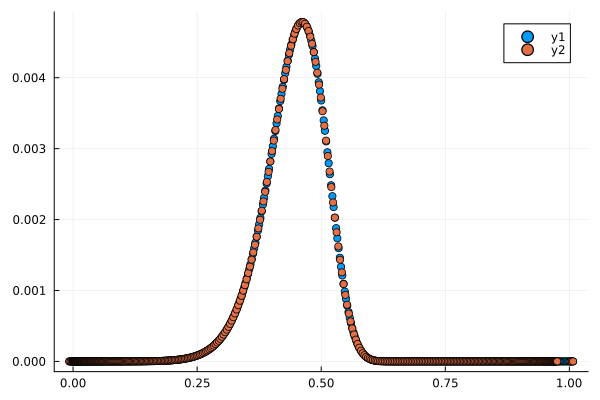

In [209]:
scatter([originalX, initX], [array, arrayloggrid])

In [210]:
aux=zeros(L)

loggrid=false
for i in 4:L-3
    aux[i]=Dertest(array,i,originalX)
end
x1=originalX
y1=aux


loggrid=true
for i in 4:L-3
    aux[i]=Dertest(arrayloggrid,i,initX)
end
x2=initX
y2=aux;

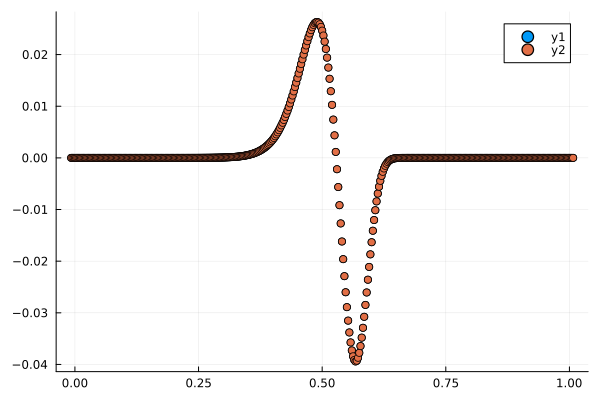

In [417]:
scatter([x1,x1],[y1,y2])